In [2]:
#gold model to predict future price of gold

#importing liabraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
GOLD =yf.Ticker("GC=F")  #ENABLES download of the prices

In [4]:
GOLD=GOLD.history(period="max")  #querry all data from the begining when the index was created.

In [21]:
GOLD

,Open,High,Low,Close,Volume
Date,,,,,
2000-08-30 00:00:00-04:00,273.899994,273.899994,273.899994,273.899994,0
2000-08-31 00:00:00-04:00,274.799988,278.299988,274.799988,278.299988,0
2000-09-01 00:00:00-04:00,277.000000,277.000000,277.000000,277.000000,0
2000-09-05 00:00:00-04:00,275.799988,275.799988,275.799988,275.799988,2
2000-09-06 00:00:00-04:00,274.200012,274.200012,274.200012,274.200012,0
...,...,...,...,...,...
2023-05-23 00:00:00-04:00,1972.400024,1972.400024,1972.400024,1972.400024,1
2023-05-24 00:00:00-04:00,1975.400024,1975.400024,1962.800049,1962.800049,189
2023-05-25 00:00:00-04:00,1943.099976,1943.099976,1943.099976,1943.099976,1


In [6]:
GOLD.index  #show the datetime index that help us to slice the data easily.

DatetimeIndex(['2000-08-30 00:00:00-04:00', '2000-08-31 00:00:00-04:00',
               '2000-09-01 00:00:00-04:00', '2000-09-05 00:00:00-04:00',
               '2000-09-06 00:00:00-04:00', '2000-09-07 00:00:00-04:00',
               '2000-09-08 00:00:00-04:00', '2000-09-11 00:00:00-04:00',
               '2000-09-12 00:00:00-04:00', '2000-09-13 00:00:00-04:00',
               ...
               '2023-05-16 00:00:00-04:00', '2023-05-17 00:00:00-04:00',
               '2023-05-18 00:00:00-04:00', '2023-05-19 00:00:00-04:00',
               '2023-05-22 00:00:00-04:00', '2023-05-23 00:00:00-04:00',
               '2023-05-24 00:00:00-04:00', '2023-05-25 00:00:00-04:00',
               '2023-05-26 00:00:00-04:00', '2023-05-29 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=5708, freq=None)

<AxesSubplot:xlabel='Date'>

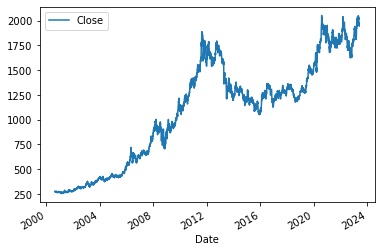

In [7]:
#plotting closing price of data on trading days
GOLD.plot.line(y="Close", use_index=True)

In [8]:
#deleting unessesary columns
del GOLD["Dividends"]
del GOLD["Stock Splits"]

In [9]:
GOLD

,Open,High,Low,Close,Volume
Date,,,,,
2000-08-30 00:00:00-04:00,273.899994,273.899994,273.899994,273.899994,0
2000-08-31 00:00:00-04:00,274.799988,278.299988,274.799988,278.299988,0
2000-09-01 00:00:00-04:00,277.000000,277.000000,277.000000,277.000000,0
2000-09-05 00:00:00-04:00,275.799988,275.799988,275.799988,275.799988,2
2000-09-06 00:00:00-04:00,274.200012,274.200012,274.200012,274.200012,0
...,...,...,...,...,...
2023-05-23 00:00:00-04:00,1972.400024,1972.400024,1972.400024,1972.400024,1
2023-05-24 00:00:00-04:00,1975.400024,1975.400024,1962.800049,1962.800049,189
2023-05-25 00:00:00-04:00,1943.099976,1943.099976,1943.099976,1943.099976,1


<AxesSubplot:xlabel='Date'>

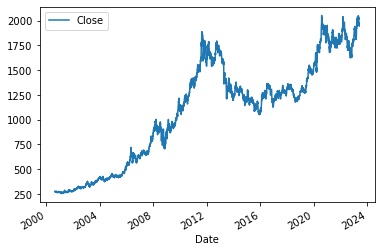

In [10]:
GOLD.plot.line(y="Close")

In [94]:
#creating the model
model = RandomForestRegressor()

In [95]:
#training the model
X = GOLD[['Open','High','Low','Volume']]
#collecting all data in rows except the last one so that we can test the model
X = X[:int(len(GOLD)-1)]
#creating the target dataset which is the closing price
y = GOLD['Close']
#collecting close prices except for the last one
y = y[:int(len(GOLD)-1)]
#fit is another term for training.
model.fit(X,y)

RandomForestRegressor()

In [96]:
#testing the model
predictions = model.predict(X)
print('The model score is:', model.score(X,y))

The model score is: 0.9999817647404498


In [97]:
#Making the predictions
new_data= GOLD[['Open','High','Low','Volume']].tail(1)
prediction = model.predict(new_data)
print('The prediction is:', prediction)

The prediction is: [1961.58498413]


In [15]:
import pickle

In [98]:
pickle.dump(model, open('C:/Users/_Emjay04/Downloads/model/randRegfile', 'wb'))

In [99]:
model_loaded = pickle.load(open('C:/Users/_Emjay04/Downloads/model/randRegfile', 'rb'))

In [100]:
model_loaded.predict(new_data)

array([1961.58498413])

In [26]:
import joblib

In [27]:
joblib.dump(model, 'C:/Users/_Emjay04/Downloads/model/randRegfile2')

['C:/Users/_Emjay04/Downloads/model/randRegfile2']

In [28]:
model_loaded2 = joblib.load('C:/Users/_Emjay04/Downloads/model/randRegfile2')

In [29]:
model_loaded2.predict(new_data)

array([1961.62898804])

In [48]:
SILVER =yf.Ticker("SI=F") #SILVER DATA FILES

In [49]:
SILVER=SILVER.history(period="max")

In [50]:
SILVER

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-08-30 00:00:00-04:00,4.950000,4.950000,4.895000,4.930000,2319,0.0,0.0
2000-08-31 00:00:00-04:00,4.920000,5.045000,4.920000,5.003000,1612,0.0,0.0
2000-09-01 00:00:00-04:00,5.035000,5.035000,4.985000,5.004000,1375,0.0,0.0
2000-09-05 00:00:00-04:00,4.990000,5.005000,4.975000,4.998000,856,0.0,0.0
2000-09-06 00:00:00-04:00,5.000000,5.000000,4.980000,4.983000,232,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-23 00:00:00-04:00,23.500000,23.629999,23.150000,23.474001,176,0.0,0.0
2023-05-24 00:00:00-04:00,23.434999,23.480000,23.065001,23.115000,13,0.0,0.0
2023-05-25 00:00:00-04:00,22.870001,22.985001,22.785999,22.785999,23,0.0,0.0


<AxesSubplot:xlabel='Date'>

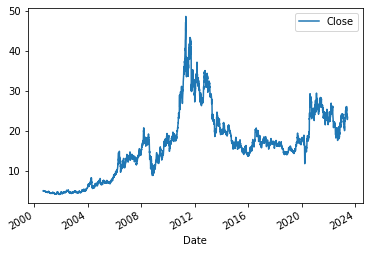

In [52]:
#plotting closing price of data on trading days
SILVER.plot.line(y="Close", use_index=True)

In [53]:
#deleting unessesary columns
del SILVER["Dividends"]
del SILVER["Stock Splits"]

In [86]:
model2 = RandomForestRegressor()

In [88]:
#training the modeL FOR SILVER
X1 = SILVER[['Open','High','Low','Volume']]
#collecting all data in rows except the last one so that we can test the model
X1 = X1[:int(len(SILVER)-1)]
#creating the target dataset which is the closing price
y1 = SILVER['Close']
#collecting close prices except for the last one
y1 = y1[:int(len(SILVER)-1)]
#fit is another term for training.
model2.fit(X1,y1)

RandomForestRegressor()

In [89]:
#testing the model
predictions1 = model2.predict(X1)
print('The model score is:', model2.score(X1,y1))

The model score is: 0.9999377431594839


In [90]:
#Making the predictions
new_data1= SILVER[['Open','High','Low','Volume']].tail(1)
prediction1 = model2.predict(new_data1)
print('The prediction is:', prediction1)

The prediction is: [23.30349972]


In [91]:
pickle.dump(model2, open('C:/Users/_Emjay04/Downloads/model/randRegfileSilver', 'wb'))

In [92]:
model_loadedSilver = pickle.load(open('C:/Users/_Emjay04/Downloads/model/randRegfileSilver', 'rb'))

In [93]:
model_loadedSilver.predict(new_data1)

array([23.30349972])